In [55]:
# Imports
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import cv2 as cv
from PIL import Image
%matplotlib inline

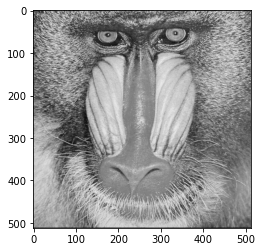

In [59]:
# Load image
img = np.asarray(Image.open("baboon.png"))
imgplot = plt.imshow(img, cmap='gray')

## 1 Transformada rápida de Fourier

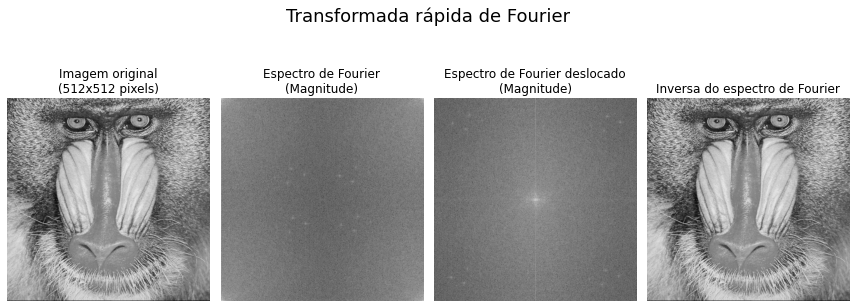

In [173]:
# Converts the image to its FFT representation
fft_img = np.fft.fft2(img)
fft_img_shifted = np.fft.fftshift(fft_img)
#fft_inv_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_img_shifted)))

# Function that takes an fft representation of a image and calculates it's magnitude, so it can be interpreted
def magnitude(img):
    return np.log(np.abs(img)).clip(0,255).astype(np.uint8)

# From a shifted fft representation, gets back the image
def fft_inv(img):
    return np.abs(np.fft.ifft2(np.fft.ifftshift(img)))

# Compares the fft img and it's zero frequency shifted to zero version
f, axs = plt.subplots(1,4, figsize=(12,12))
f.suptitle('Transformada rápida de Fourier', fontsize = 18)
axs[0].set_title('Imagem original\n(512x512 pixels)', fontsize = 12)
axs[0].set_axis_off()
axs[0].imshow(img, cmap='gray')
axs[1].set_title('Espectro de Fourier\n(Magnitude)', fontsize = 12)
axs[1].set_axis_off()
axs[1].imshow(magnitude(fft_img), cmap='gray')
axs[2].set_title('Espectro de Fourier deslocado\n(Magnitude)', fontsize = 12)
axs[2].set_axis_off()
axs[2].imshow(magnitude(fft_img_shifted), cmap='gray')
axs[3].set_title('Inversa do espectro de Fourier', fontsize = 12)
axs[3].set_axis_off()
axs[3].imshow(fft_inv(fft_img_shifted), cmap='gray')
plt.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

### 1.1 Filtros passa-baixa

/tmp/ipykernel_6858/3037536344.py:8: RuntimeWarning: divide by zero encountered in log
  return np.log(np.abs(img)).clip(0,255).astype(np.uint8)


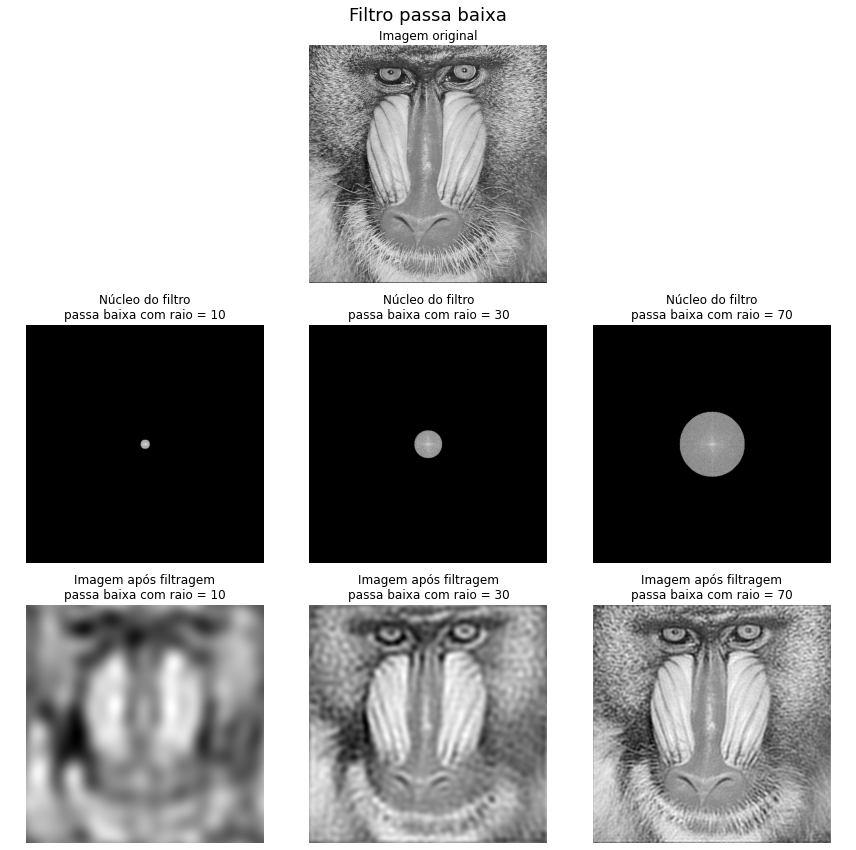

In [143]:
# First its necessary to create the filter, that has the same size as the image
def create_inner_circle(shape, radius):
    mask = np.zeros(shape)
    cy = mask.shape[0] // 2
    cx = mask.shape[1] // 2
    cv.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]
    return mask

mask1 = create_inner_circle(img.shape, 10)
dft_shift_masked1 = np.multiply(fft_img_shifted, mask1) / 255
img_filtered1 = fft_inv(dft_shift_masked1)

mask2 = create_inner_circle(img.shape, 30)
dft_shift_masked2 = (np.multiply(fft_img_shifted, mask2) / 255)
img_filtered2 = fft_inv(dft_shift_masked2)

mask3 = create_inner_circle(img.shape, 70)
dft_shift_masked3 = np.multiply(fft_img_shifted, mask3) / 255
img_filtered3 = fft_inv(dft_shift_masked3)

fig, axs = plt.subplots(3,3, figsize=(12,12))
fig.suptitle('Filtro passa baixa', fontsize = 18)
axs[0][0].axis('off')

axs[0][1].set_title('Imagem original', fontsize = 12)
axs[0][1].set_axis_off()
axs[0][1].imshow(img, cmap='gray')

axs[0][2].axis("off")

axs[1][0].set_title('Núcleo do filtro\npassa baixa com raio = 10', fontsize = 12)
axs[1][0].set_axis_off()
axs[1][0].imshow(magnitude(dft_shift_masked1), cmap='gray')

axs[1][1].set_title('Núcleo do filtro\npassa baixa com raio = 30', fontsize = 12)
axs[1][1].set_axis_off()
axs[1][1].imshow(magnitude(dft_shift_masked2), cmap='gray')

axs[1][2].set_title('Núcleo do filtro\npassa baixa com raio = 70', fontsize = 12)
axs[1][2].set_axis_off()
axs[1][2].imshow(magnitude(dft_shift_masked3), cmap='gray')

axs[2][0].set_title('Imagem após filtragem\npassa baixa com raio = 10', fontsize = 12)
axs[2][0].set_axis_off()
axs[2][0].imshow(img_filtered1, cmap='gray')

axs[2][1].set_title('Imagem após filtragem\npassa baixa com raio = 30', fontsize = 12)
axs[2][1].set_axis_off()
axs[2][1].imshow(img_filtered2, cmap='gray')

axs[2][2].set_title('Imagem após filtragem\npassa baixa com raio = 70', fontsize = 12)
axs[2][2].set_axis_off()
axs[2][2].imshow(img_filtered3, cmap='gray')
plt.tight_layout()
plt.show()

### 1.2 Filtros passa-alta

/tmp/ipykernel_6858/3037536344.py:8: RuntimeWarning: divide by zero encountered in log
  return np.log(np.abs(img)).clip(0,255).astype(np.uint8)


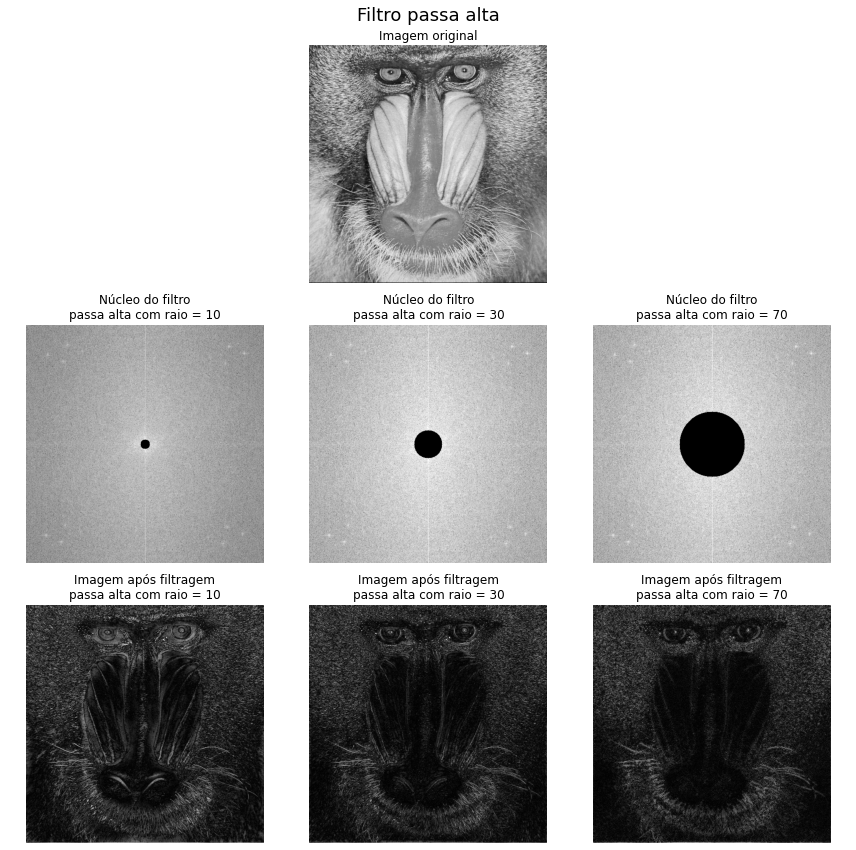

In [144]:
# The outter circle is created by taking the complementary of the inner circle
def create_outter_circle(shape, radius):
    mask = np.zeros(shape)
    cy = mask.shape[0] // 2
    cx = mask.shape[1] // 2
    cv.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]
    return 255 - mask

mask1 = create_outter_circle(img.shape, 10)
dft_shift_masked1 = np.multiply(fft_img_shifted, mask1) / 255
img_filtered1 = fft_inv(dft_shift_masked1)

mask2 = create_outter_circle(img.shape, 30)
dft_shift_masked2 = np.multiply(fft_img_shifted, mask2) / 255
img_filtered2 = fft_inv(dft_shift_masked2)

mask3 = create_outter_circle(img.shape, 70)
dft_shift_masked3 = np.multiply(fft_img_shifted, mask3) / 255
img_filtered3 = fft_inv(dft_shift_masked3)

fig, axs = plt.subplots(3,3, figsize=(12,12))
fig.suptitle('Filtro passa alta', fontsize = 18)
axs[0][0].axis('off')

axs[0][1].set_title('Imagem original', fontsize = 12)
axs[0][1].set_axis_off()
axs[0][1].imshow(img, cmap='gray')

axs[0][2].axis("off")

axs[1][0].set_title('Núcleo do filtro\npassa alta com raio = 10', fontsize = 12)
axs[1][0].set_axis_off()
axs[1][0].imshow(magnitude(dft_shift_masked1), cmap='gray')

axs[1][1].set_title('Núcleo do filtro\npassa alta com raio = 30', fontsize = 12)
axs[1][1].set_axis_off()
axs[1][1].imshow(magnitude(dft_shift_masked2), cmap='gray')

axs[1][2].set_title('Núcleo do filtro\npassa alta com raio = 70', fontsize = 12)
axs[1][2].set_axis_off()
axs[1][2].imshow(magnitude(dft_shift_masked3), cmap='gray')

axs[2][0].set_title('Imagem após filtragem\npassa alta com raio = 10', fontsize = 12)
axs[2][0].set_axis_off()
axs[2][0].imshow(img_filtered1, cmap='gray')

axs[2][1].set_title('Imagem após filtragem\npassa alta com raio = 30', fontsize = 12)
axs[2][1].set_axis_off()
axs[2][1].imshow(img_filtered2, cmap='gray')

axs[2][2].set_title('Imagem após filtragem\npassa alta com raio = 70', fontsize = 12)
axs[2][2].set_axis_off()
axs[2][2].imshow(img_filtered3, cmap='gray')
plt.tight_layout()
plt.show()

## 1.3 Filtros passa-faixa

/tmp/ipykernel_6858/3037536344.py:8: RuntimeWarning: divide by zero encountered in log
  return np.log(np.abs(img)).clip(0,255).astype(np.uint8)


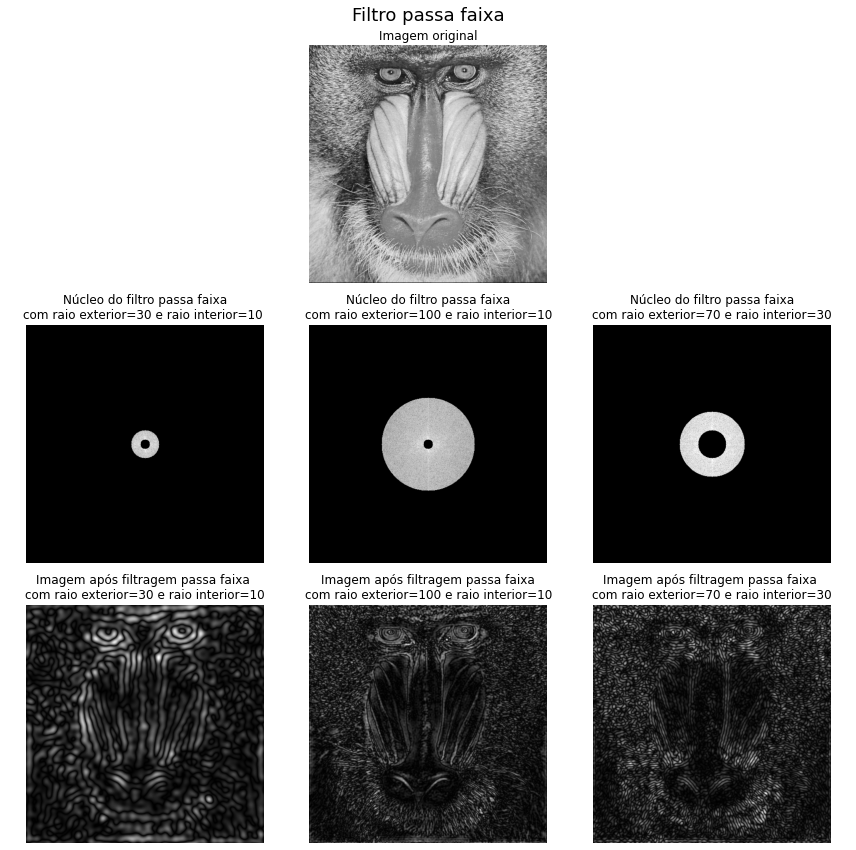

In [145]:
# the idea is to subtract two circles from each other
def create_disk(shape, outter_radius, inner_radius):
    assert outter_radius > inner_radius
    outter_mask = np.zeros(shape)
    inner_mask = np.zeros(shape)
    cy = outter_mask.shape[0] // 2
    cx = outter_mask.shape[1] // 2
    cv.circle(outter_mask, (cx,cy), outter_radius, (255,255,255), -1)[0]
    cv.circle(inner_mask, (cx,cy), inner_radius, (255,255,255), -1)[0]
    return outter_mask - inner_mask

mask1 = create_disk(img.shape, 30, 10)
dft_shift_masked1 = np.multiply(fft_img_shifted, mask1) / 255
img_filtered1 = fft_inv(dft_shift_masked1)

mask2 = create_disk(img.shape, 100, 10)
dft_shift_masked2 = np.multiply(fft_img_shifted, mask2) / 255
img_filtered2 = fft_inv(dft_shift_masked2)

mask3 = create_disk(img.shape, 70,30)
dft_shift_masked3 = np.multiply(fft_img_shifted, mask3) / 255
img_filtered3 = fft_inv(dft_shift_masked3)

fig, axs = plt.subplots(3,3, figsize=(12,12))
fig.suptitle('Filtro passa faixa', fontsize = 18)
axs[0][0].axis('off')

axs[0][1].set_title('Imagem original', fontsize = 12)
axs[0][1].set_axis_off()
axs[0][1].imshow(img, cmap='gray')

axs[0][2].axis("off")

axs[1][0].set_title('Núcleo do filtro passa faixa\ncom raio exterior=30 e raio interior=10 ', fontsize = 12)
axs[1][0].set_axis_off()
axs[1][0].imshow(magnitude(dft_shift_masked1), cmap='gray')

axs[1][1].set_title('Núcleo do filtro passa faixa\ncom raio exterior=100 e raio interior=10', fontsize = 12)
axs[1][1].set_axis_off()
axs[1][1].imshow(magnitude(dft_shift_masked2), cmap='gray')

axs[1][2].set_title('Núcleo do filtro passa faixa\ncom raio exterior=70 e raio interior=30', fontsize = 12)
axs[1][2].set_axis_off()
axs[1][2].imshow(magnitude(dft_shift_masked3), cmap='gray')

axs[2][0].set_title('Imagem após filtragem passa faixa \ncom raio exterior=30 e raio interior=10', fontsize = 12)
axs[2][0].set_axis_off()
axs[2][0].imshow(img_filtered1, cmap='gray')

axs[2][1].set_title('Imagem após filtragem passa faixa\ncom raio exterior=100 e raio interior=10', fontsize = 12)
axs[2][1].set_axis_off()
axs[2][1].imshow(img_filtered2, cmap='gray')

axs[2][2].set_title('Imagem após filtragem passa faixa \ncom raio exterior=70 e raio interior=30', fontsize = 12)
axs[2][2].set_axis_off()
axs[2][2].imshow(img_filtered3, cmap='gray')
plt.tight_layout()
plt.show()

## 1.4 Filtros rejeita-faixa

/tmp/ipykernel_6858/3037536344.py:8: RuntimeWarning: divide by zero encountered in log
  return np.log(np.abs(img)).clip(0,255).astype(np.uint8)


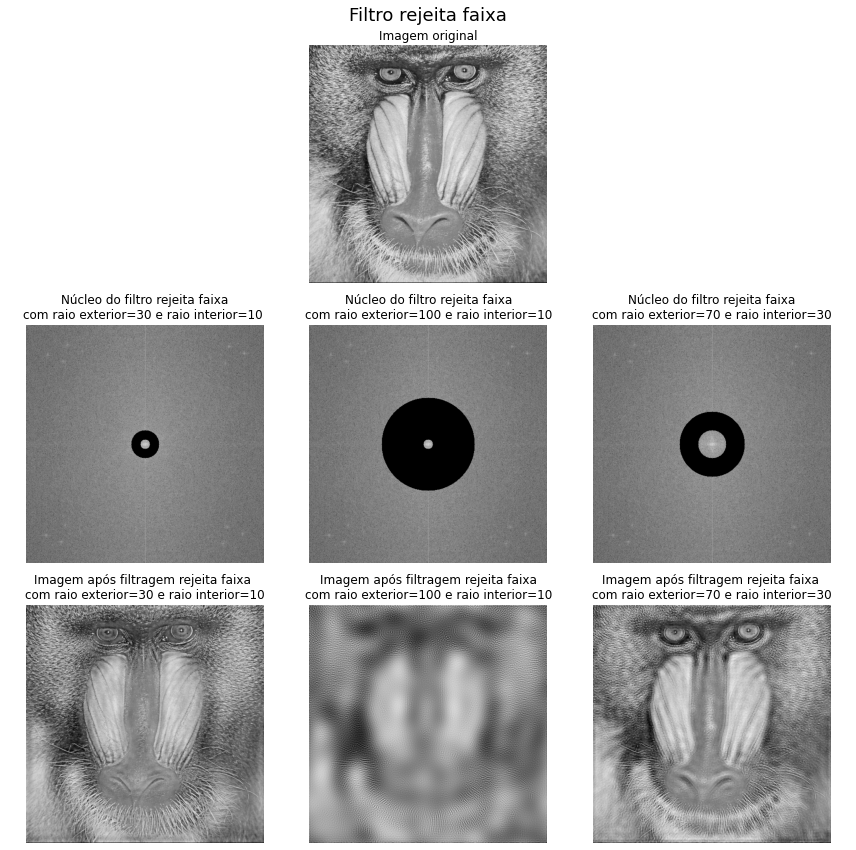

In [174]:
# the idea is to subtract two circles from each other
def create_inverse_disk(shape, outter_radius, inner_radius):
    assert outter_radius > inner_radius
    aux_disk = create_disk(shape, outter_radius, inner_radius)
    mask = np.full(shape, 255)
    return mask - aux_disk


mask1 = create_inverse_disk(img.shape, 30, 10)
dft_shift_masked1 = np.multiply(fft_img_shifted, mask1) / 255
img_filtered1 = fft_inv(dft_shift_masked1)

mask2 = create_inverse_disk(img.shape, 100, 10)
dft_shift_masked2 = np.multiply(fft_img_shifted, mask2) / 255
img_filtered2 = fft_inv(dft_shift_masked2)

mask3 = create_inverse_disk(img.shape, 70,30)
dft_shift_masked3 = np.multiply(fft_img_shifted, mask3) / 255
img_filtered3 = fft_inv(dft_shift_masked3)

fig, axs = plt.subplots(3,3, figsize=(12,12))
fig.suptitle('Filtro rejeita faixa', fontsize = 18)
axs[0][0].axis('off')

axs[0][1].set_title('Imagem original', fontsize = 12)
axs[0][1].set_axis_off()
axs[0][1].imshow(img, cmap='gray')

axs[0][2].axis("off")

axs[1][0].set_title('Núcleo do filtro rejeita faixa\ncom raio exterior=30 e raio interior=10 ', fontsize = 12)
axs[1][0].set_axis_off()
axs[1][0].imshow(magnitude(dft_shift_masked1), cmap='gray')

axs[1][1].set_title('Núcleo do filtro rejeita faixa\ncom raio exterior=100 e raio interior=10', fontsize = 12)
axs[1][1].set_axis_off()
axs[1][1].imshow(magnitude(dft_shift_masked2), cmap='gray')

axs[1][2].set_title('Núcleo do filtro rejeita faixa\ncom raio exterior=70 e raio interior=30', fontsize = 12)
axs[1][2].set_axis_off()
axs[1][2].imshow(magnitude(dft_shift_masked3), cmap='gray')

axs[2][0].set_title('Imagem após filtragem rejeita faixa \ncom raio exterior=30 e raio interior=10', fontsize = 12)
axs[2][0].set_axis_off()
axs[2][0].imshow(img_filtered1, cmap='gray')

axs[2][1].set_title('Imagem após filtragem rejeita faixa\ncom raio exterior=100 e raio interior=10', fontsize = 12)
axs[2][1].set_axis_off()
axs[2][1].imshow(img_filtered2, cmap='gray')

axs[2][2].set_title('Imagem após filtragem rejeita faixa \ncom raio exterior=70 e raio interior=30', fontsize = 12)
axs[2][2].set_axis_off()
axs[2][2].imshow(img_filtered3,  cmap='gray')
plt.tight_layout()
plt.show()

### 1.5 Compressão

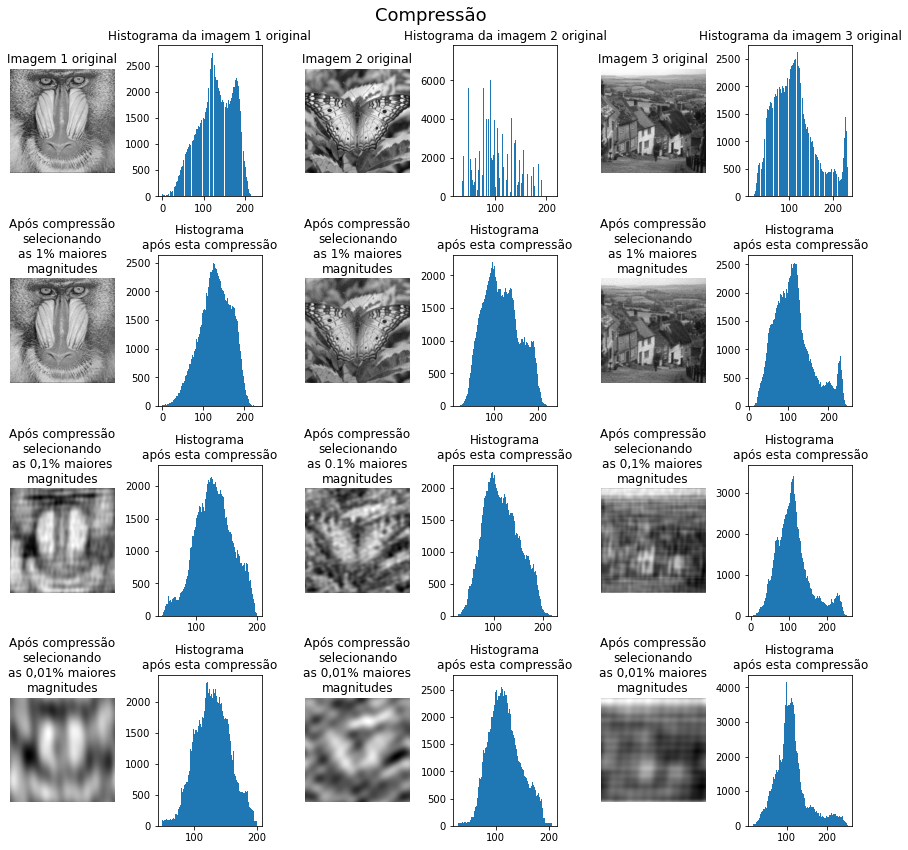

In [187]:
def compress(img, keep):
    fft_img = np.fft.fft2(img)
    # Sort the magnitudes
    fft_sort = np.sort(magnitude(fft_img).reshape(-1))
    # Find the threshold based on the percentage given by the parameter keep
    threshold = fft_sort[int(np.floor((1-keep)*len(fft_sort)))]
    
    # Use the threshold as a mask
    fft_img[magnitude(fft_img) < threshold] = 0
    
    # Recover the image
    img_filtered = np.abs(np.fft.ifft2(fft_img))
    
    return img_filtered

img1 = np.asarray(Image.open("baboon.png"))
img2 = np.asarray(Image.open("butterfly.png"))
img3 = np.asarray(Image.open("city.png"))
#plt.hist(img.ravel(), bins=256)

fig, axs = plt.subplots(4,6, figsize=(12,12))
fig.suptitle('Compressão', fontsize = 18)
axs[0][0].set_title('Imagem 1 original', fontsize = 12)
axs[0][0].set_axis_off()
axs[0][0].imshow(img1, cmap='gray')

axs[0][1].set_title('Histograma da imagem 1 original', fontsize = 12)
axs[0][1].hist(img1.ravel(), bins=256)

axs[0][2].set_title('Imagem 2 original', fontsize = 12)
axs[0][2].set_axis_off()
axs[0][2].imshow(img2, cmap='gray')

axs[0][3].set_title('Histograma da imagem 2 original', fontsize = 12)
axs[0][3].hist(img2.ravel(), bins=256)

axs[0][4].set_title('Imagem 3 original', fontsize = 12)
axs[0][4].set_axis_off()
axs[0][4].imshow(img3, cmap='gray')

axs[0][5].set_title('Histograma da imagem 3 original', fontsize = 12)
axs[0][5].hist(img3.ravel(), bins=256)


axs[1][0].set_title('Após compressão\nselecionando\nas 1% maiores\nmagnitudes', fontsize = 12)
axs[1][0].set_axis_off()
axs[1][0].imshow(compress(img1,0.01), cmap='gray')

axs[1][1].set_title('Histograma\napós esta compressão', fontsize = 12)
axs[1][1].hist(compress(img1,0.01).ravel(), bins=256)

axs[1][2].set_title('Após compressão\nselecionando\nas 1% maiores\nmagnitudes', fontsize = 12)
axs[1][2].set_axis_off()
axs[1][2].imshow(compress(img2,0.01), cmap='gray')

axs[1][3].set_title('Histograma\napós esta compressão', fontsize = 12)
axs[1][3].hist(compress(img2,0.01).ravel(), bins=256)

axs[1][4].set_title('Após compressão\nselecionando\nas 1% maiores\nmagnitudes', fontsize = 12)
axs[1][4].set_axis_off()
axs[1][4].imshow(compress(img3,0.01), cmap='gray')

axs[1][5].set_title('Histograma\napós esta compressão', fontsize = 12)
axs[1][5].hist(compress(img3,0.01).ravel(), bins=256)

axs[2][0].set_title('Após compressão\nselecionando\nas 0,1% maiores\nmagnitudes', fontsize = 12)
axs[2][0].set_axis_off()
axs[2][0].imshow(compress(img1,0.001), cmap='gray')

axs[2][1].set_title('Histograma\napós esta compressão', fontsize = 12)
axs[2][1].hist(compress(img1,0.001).ravel(), bins=256)

axs[2][2].set_title('Após compressão\nselecionando\nas 0.1% maiores\nmagnitudes', fontsize = 12)
axs[2][2].set_axis_off()
axs[2][2].imshow(compress(img2,0.001), cmap='gray')

axs[2][3].set_title('Histograma\napós esta compressão', fontsize = 12)
axs[2][3].hist(compress(img2,0.001).ravel(), bins=256)

axs[2][4].set_title('Após compressão\nselecionando\nas 0,1% maiores\nmagnitudes', fontsize = 12)
axs[2][4].set_axis_off()
axs[2][4].imshow(compress(img3,0.001), cmap='gray')

axs[2][5].set_title('Histograma\napós esta compressão', fontsize = 12)
axs[2][5].hist(compress(img3,0.001).ravel(), bins=256)


axs[3][0].set_title('Após compressão\nselecionando\nas 0,01% maiores\nmagnitudes', fontsize = 12)
axs[3][0].set_axis_off()
axs[3][0].imshow(compress(img1,0.0001), cmap='gray')

axs[3][1].set_title('Histograma\napós esta compressão', fontsize = 12)
axs[3][1].hist(compress(img1,0.0001).ravel(), bins=256)

axs[3][2].set_title('Após compressão\nselecionando\nas 0,01% maiores\nmagnitudes', fontsize = 12)
axs[3][2].set_axis_off()
axs[3][2].imshow(compress(img2,0.0001), cmap='gray')

axs[3][3].set_title('Histograma\napós esta compressão', fontsize = 12)
axs[3][3].hist(compress(img2,0.0001).ravel(), bins=256)

axs[3][4].set_title('Após compressão\nselecionando\nas 0,01% maiores\nmagnitudes', fontsize = 12)
axs[3][4].set_axis_off()
axs[3][4].imshow(compress(img3,0.0001), cmap='gray')

axs[3][5].set_title('Histograma\napós esta compressão', fontsize = 12)
axs[3][5].hist(compress(img3,0.0001).ravel(), bins=256)

plt.tight_layout()
plt.show()